## ANN Model

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
# ANN model https://www.analyticsvidhya.com/blog/2021/10/implementing-artificial-neural-networkclassification-in-python-from-scratch/
#Importing necessary Libraries

import numpy as np
import pandas as pd
import tensorflow as tf

data = pd.read_excel('peerToPeerLoans.xlsx',header= None)

FileNotFoundError: [Errno 2] No such file or directory: 'peerToPeerLoans.xlsx'

In [5]:
#Generating Matrix of Features

import pandas as pd

import tensorflow as tf

from tensorflow import keras

from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt

X = data.iloc[:,1:-1].values
Y = data.iloc[:,-1].values



In [6]:
#Splitting dataset into training and testing dataset

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20) #random_state=1

In [7]:
#Performing Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'OWN'

In [19]:
#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=128,activation="relu"))
ann.add(tf.keras.layers.Dense(units=64,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=32,activation="relu"))
# Use dropout to cut some connections and reduce overfitting
ann.add(tf.keras.layers.Dropout(0.5))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [20]:
# Calculating weights due to unbalanced dataset


w0=12788/(2*10361)
print(w0)


w1=12788/(2*2427)
print(w1)

0.6171218994305568
2.634528224145035


In [21]:
#Fitting ANN
history = ann.fit(X_train,Y_train,validation_data=(X_test, Y_test), class_weight = {0:0.61, 1:2.63},batch_size=32,epochs = 5)

Epoch 1/5
1599/1599 [==============================] - 4s 2ms/step - loss: 0.6268 - accuracy: 0.6317 - val_loss: 0.6422 - val_accuracy: 0.6162
Epoch 2/5
1599/1599 [==============================] - 3s 2ms/step - loss: 0.6203 - accuracy: 0.6457 - val_loss: 0.6627 - val_accuracy: 0.6089
Epoch 3/5
1599/1599 [==============================] - 3s 2ms/step - loss: 0.6169 - accuracy: 0.6476 - val_loss: 0.6521 - val_accuracy: 0.6270
Epoch 4/5
1599/1599 [==============================] - 4s 2ms/step - loss: 0.6159 - accuracy: 0.6507 - val_loss: 0.6064 - val_accuracy: 0.6386
Epoch 5/5
1599/1599 [==============================] - 4s 2ms/step - loss: 0.6147 - accuracy: 0.6526 - val_loss: 0.6244 - val_accuracy: 0.6339


In [22]:
Y_pred = np.round_(ann.predict(X_test))
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[6549, 3919],
       [ 763, 1557]])

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

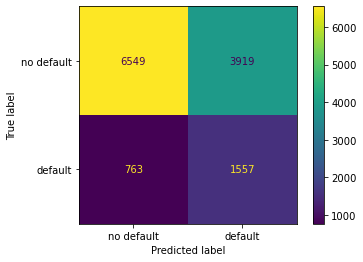

In [24]:
cm_vis = ConfusionMatrixDisplay(cm, display_labels=['no default','default'])
cm_vis.plot()
plt.show()

In [25]:
# Performance report including precision, recall, f1-score
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74     10468
           1       0.28      0.67      0.40      2320

    accuracy                           0.63     12788
   macro avg       0.59      0.65      0.57     12788
weighted avg       0.78      0.63      0.68     12788



In [26]:
print(np.count_nonzero(Y == 1))
print(np.count_nonzero(Y == 0))
len(Y)
52177/63940
52177/11763

11763
52177


4.435688174785344

In [27]:
print(np.count_nonzero(Y_test == 1))
print(np.count_nonzero(Y_test == 0))
15705/3477

2320
10468


4.516824849007765

In [28]:
#history = ann.fit(X_train,Y_train,validation_data=(X_test, Y_test), verbose=1, 
                          #class_weight = {0:3.15, 1:0.59},  # class_weights for binary
#                          epochs=20)

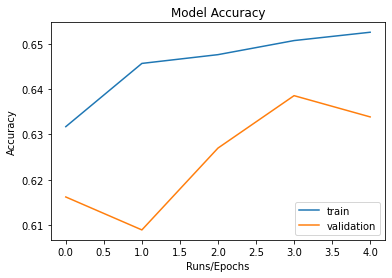

In [29]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.xlabel("Runs/Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="lower right")
    plt.show()

plot_hist(history)

In [30]:
#Predicting result for Single Observation

ann.evaluate(X_test,Y_test)



400/400 [==============================] - 1s 1ms/step - loss: 0.6244 - accuracy: 0.6339


[0.6244282126426697, 0.6338754892349243]

In [31]:
#Y_pred = ann.predict(Y_train)
#Y_pred = ann.predict(Y_test)

In [32]:
!pip install keras
from keras import metrics

You should consider upgrading via the '/Users/admin/opt/miniconda3/bin/python -m pip install --upgrade pip' command.


In [33]:
#print(len(Y_test_predicted))
print(len(Y_test))

12788


In [34]:
count = 0
for i in range(0,200):
  if (Y_test[i] == Y_pred[i]):
    count = count + 1

print(count)

119


Accuracy:  0.633875508289021
Confusion Matrix : 
[[6549 3919]
 [ 763 1557]]


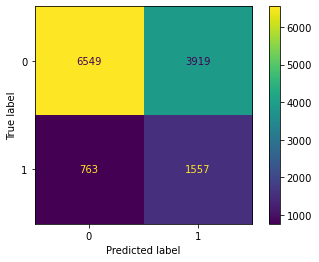

              precision    recall  f1-score   support

           0       0.90      0.63      0.74     10468
           1       0.28      0.67      0.40      2320

    accuracy                           0.63     12788
   macro avg       0.59      0.65      0.57     12788
weighted avg       0.78      0.63      0.68     12788



In [35]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

accuracy = accuracy_score(Y_test,Y_pred)
print('Accuracy: ', accuracy)

# Confusion Matrix 
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : ')
print(cm)

cm_vis = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cm_vis.plot()
plt.show()

# Performance report including precision, recall, f1-score
print(metrics.classification_report(Y_test, Y_pred))

## SVM Model

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='sigmoid',gamma='auto',probability=True).fit(X_train, Y_train)

In [ ]:
Y_pred_SVM = svc.predict(X_test)

In [49]:
predicted_probas=svc.predict_proba(X_test)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_SVM)

0.7218486080700657

In [68]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(Y_test, Y_pred_SVM)
cnf_matrix

array([[8634, 1793],
       [1764,  597]])

In [69]:
TN, FP, FN, TP = confusion_matrix(Y_test, Y_pred_SVM).ravel() 
TN, FP, FN, TP

(8634, 1793, 1764, 597)

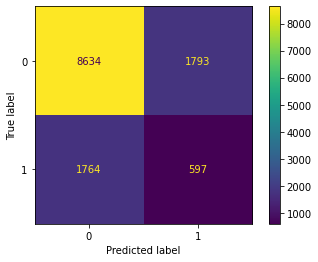

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt     

#ax= plt.subplot()
#sns.heatmap(cnf_matrix, annot=True,cmap=plt.cm.Blues, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
#ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['0', '1','0','1']);

cm_vis2 = ConfusionMatrixDisplay(cnf_matrix, display_labels=[0,1])
cm_vis2.plot()
plt.show()

In [71]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

0.7218486080700657

In [72]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.25285895806861497

In [73]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.8280425817588952

In [74]:
#Precision or Positive Predictive Value (PPV)
Precision = TP/ (TP+FP)
Precision

0.2497907949790795

In [75]:
#Negative Predictive Value (NPV)
NPV = TN/(TN+FN)
NPV

0.8303519907674553

In [76]:
#False Discovery Rate (FDR)
FDR = 1-Precision
FDR

0.7502092050209205

In [77]:
#F1 score( harmonic mean of precision and sensitivity(recall)
F1= 2/ ((1/Precision) + (1/Sensitivity))
F1

0.25131551252367923

In [78]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.6535072481287889

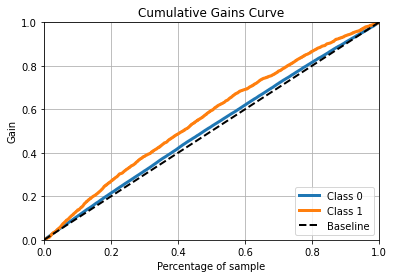

In [83]:
import matplotlib.pyplot as plt
!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(Y_test, predicted_probas)
plt.show()

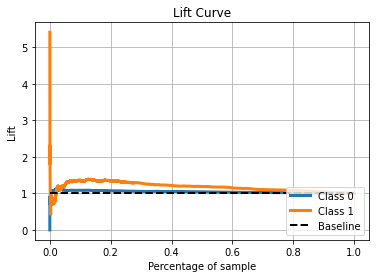

In [84]:
skplt.metrics.plot_lift_curve(Y_test, predicted_probas)
plt.show()

In [ ]:
skplt.metrics.plot_ks_statistic(Y_test, predicted_probas)
plt.show()

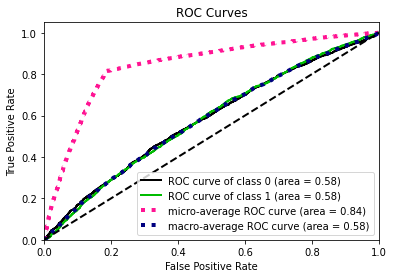

In [88]:
skplt.metrics.plot_roc(Y_test, predicted_probas)
plt.show()

## SVM Attempt 2

In [89]:
from sklearn import svm

# gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
#svc = svm.SVC()  # SVM Classifier with default rbf kernel 
#svc = svm.SVC(kernel='linear')  # linear kernel 
svc = svm.SVC(kernel='poly')   #, degree=4)    # poly kernel 
#svc = svm.SVC(kernel='rbf')    #, C=1) #gamma = 0.01)

svc.fit(X_train, Y_train)       # Fit it with the training data 

Y_pred_SVM_2 = svc.predict(X_test)  # make the prediction on the validation/test data from the primary dataset 
#y1_pred = svc.predict(X1)     # make the prediction on the real test data

In [91]:
accuracy_score(Y_test, Y_pred_SVM_2)


0.8164685642790116

In [92]:
cnf_matrix=confusion_matrix(Y_test, Y_pred_SVM_2)
cnf_matrix

array([[10379,    48],
       [ 2299,    62]])

In [95]:
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74     10427
           1       0.29      0.68      0.41      2361

    accuracy                           0.64     12788
   macro avg       0.59      0.65      0.57     12788
weighted avg       0.78      0.64      0.68     12788



## LR model